In [2]:
library("ggplot2")
library("dplyr")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
adult <- read.csv("adult.csv")

# Testes de Hipótese

Muitas vezes, quando estamos fazendo alguma análise, queremos provar que **duas médias são diferentes**. <br>
Por exemplo, temos dois grupos de pacientes, um que tomou analgésico e outro que tomou um placebo, e queremos saber se existe diferença na nota que eles atribuem para sua dor antes e depois de tomar o remédio/placebo. <br>
<br>
Esse é o típico cenário em que devemos aplicar um **teste de hipótese**.

### Amostra vs População

![censovssample](census-vs-sample.jpg)
Os testes de hipótese precisam ser feitos porque, muitas vezes, nós não temos a totalidade dos dados e sim uma **amostra**.
<br> <br>
Existem teoremas matemáticos que garantem que as médias tiradas de amostras aleatorias de uma população convergem para a própria média da população.
Mas pode ser que, por acaso, vc tenha pegado uma amostra extrema que não representa essa população - **os testes de hipótese são uma forma de verificar qual é essa probabilidade e se ela é considerável**.

Os **testes de hipóteses** têm uma estrutura comum. Eles assumem uma *hipótese nula* e uma *hipótese alternativa*.<br>
Em geral: <br>
$H_0 =$ (hipótese nula) as médias são iguais <br>
$H_A =$ (hipótese alternativa) as médias são diferentes (você pode mudar isso para "maior" ou "menor" também

O que o teste de hipótese nos retorna é o **p-valor**, ele nos dá **a probabilidade de cometer um erro ao falar que $H_A$ está certa** . <br>
Em geral, quando o $p-valor \leq 0.05$ aceitamos $H_A$, pois a probabilidade de "estarmos falando besteira" é menor do que 5%

### Testes paramétricos VS não-paramétricos

![distribuicaonormal](normal.jpeg)

Os testes de hipótese podem ser divididos entre paramétricos e não paramétricos.
<br>
Os testes **paramétricos** assumem a **distribuição normal dos dados**, enquanto os **não paramétricos** não possuem tal premissa.<br>
A distribuição normal é a famosa curva de sino, em que a maioria dos valores estão próximos de uma média.

## Kolgomorov-Smirnov

Para saber se devemos ou não aplicar um teste paramétrico ou não paramétrico, precisamos saber se nossos dados seguem ou não uma distribuição normal. Para isso usamos o teste de *Kolgomorov-Smirnov* comparando a nossa amostra com uma distribuição normal.

Nesse teste, as hipóteses são as seguintes:<br>
$H_0 = $ a distribuição é normal <br>
$H_A = $ a distribuição não é normal

Vamos fazer esse teste largura da sépala das flores da espécie iris

In [5]:
ks.test(iris$Sepal.Width,"pnorm", mean(iris$Sepal.Width), sd(iris$Sepal.Width))

Warning message in ks.test(iris$Sepal.Width, "pnorm", mean(iris$Sepal.Width), sd(iris$Sepal.Width)):
“ties should not be present for the Kolmogorov-Smirnov test”



	One-sample Kolmogorov-Smirnov test

data:  iris$Sepal.Width
D = 0.10566, p-value = 0.07023
alternative hypothesis: two-sided


Nosso $p_{valor}$ deu 7%, então podemos considerar a distribuição normal

Vamos ver agora se isso se mantém para as sub-espécies das flores iris

In [6]:
levels(iris$Species)

[1] "setosa"     "versicolor" "virginica"

In [7]:
iris_setosa <- iris %>% filter(Species == "setosa")
iris_versicolor <- iris %>% filter(Species == "versicolor")
iris_virginica <- iris %>% filter(Species == "virginica")

In [11]:
ks_setosa <- ks.test(iris_setosa$Sepal.Width,"pnorm", mean(iris_setosa$Sepal.Width), sd(iris_setosa$Sepal.Width))
ks_versicolor <- ks.test(iris_versicolor$Sepal.Width,"pnorm", mean(iris_versicolor$Sepal.Width), sd(iris_versicolor$Sepal.Width))
ks_virginica <- ks.test(iris_virginica$Sepal.Width,"pnorm", mean(iris_virginica$Sepal.Width), sd(iris_virginica$Sepal.Width))
print(paste("P-valor iris setosa = ",ks_setosa$p.value," | P-valor iris versicolor = ",ks_versicolor$p.value,"| P-valor iris virginica = ", ks_virginica$p.value ))

Warning message in ks.test(iris_setosa$Sepal.Width, "pnorm", mean(iris_setosa$Sepal.Width), :
“ties should not be present for the Kolmogorov-Smirnov test”
Warning message in ks.test(iris_versicolor$Sepal.Width, "pnorm", mean(iris_versicolor$Sepal.Width), :
“ties should not be present for the Kolmogorov-Smirnov test”
Warning message in ks.test(iris_virginica$Sepal.Width, "pnorm", mean(iris_virginica$Sepal.Width), :
“ties should not be present for the Kolmogorov-Smirnov test”


[1] "P-valor iris setosa =  0.643712515886468  | P-valor iris versicolor =  0.460425126089097 | P-valor iris virginica =  0.386975907628897"


Os valores p foram ainda mais altos, podemos assumir premissas paramétricas

####

In [14]:
f_test <- var.test(iris_setosa$Sepal.Width,iris_versicolor$Sepal.Width)

In [15]:
f_test$p.value

[1] 0.1894885

In [ ]:
t.test()

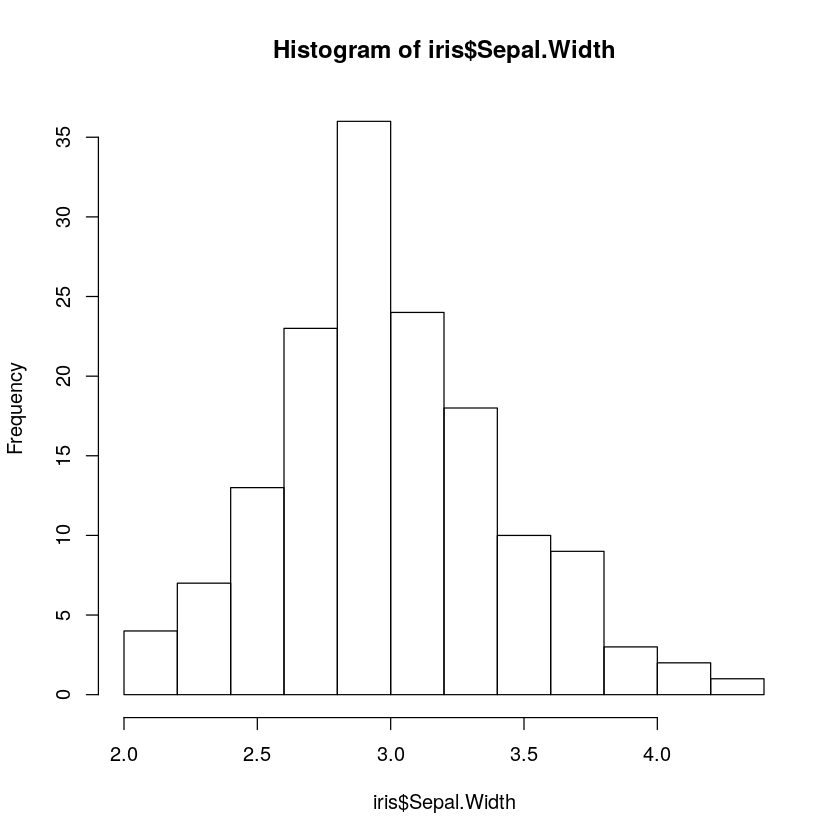

In [41]:
hist(iris$Sepal.Width)

O nosso $p_{valor} \geq 5%$, podemos assumir que a distribução seja normal.